In [1]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
# import tensorflow as tf
import pandas as pd



In [2]:
import pandas as pd
import glob

# Verzeichnis mit CSV-Dateien
file_path_pattern = r'..\..\..\data\attitude_roots_disapere\*.csv'

# Alle CSV-Dateien im Verzeichnis finden
csv_files = glob.glob(file_path_pattern)

# CSV-Dateien zu einem DataFrame kombinieren
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df = combined_df[['text', 'aspect']]
df = df.rename(columns={'aspect': 'labels'})
df = df.rename(columns={'text': 'data'})
df = df.drop_duplicates(keep='first')



print(len(df))


9572


In [3]:
# data cleaning

df = df[df['data'].apply(lambda x: len(str(x).split()) >= 3)]

#df['cleaned_text'] = df['data'].str.replace(r'^\[?\d+(\.\d+)?\]?\s*-?\s*', '', regex=True)
df

,data,labels
0,The paper explores and experiments on extrapol...,none
1,Attribute manipulation is done by predicting l...,none
2,Authors experimentally show dependence of rang...,none
3,Suggested concepts are explained in a clear wa...,none
4,"Techniques proposed for improving ""steerabilit...",none
...,...,...
9941,It is difficult to judge the performance of th...,asp_substance
9942,"3.\tThe proposed method, which decomposes a pr...",none
9943,"For example, representing a movie or news arti...",none
9944,"In this way, the proposed method can be tested...",none


In [4]:
# split train and test first
from sklearn.model_selection import train_test_split
import pandas as pd



# Aufteilen in Trainings- und Testdaten
df, test_df = train_test_split(df, test_size=0.15, random_state=42)
print(len(df))



7759


In [5]:
from transformers import pipeline
import pandas as pd

paraphraser = pipeline("text2text-generation", model="t5-base", tokenizer="t5-base")

In [6]:
def generate_similar_text(text):
    try:
        if not isinstance(text, str) or not text.strip():
            raise ValueError("Input must be a non-empty string.")

        # Generate paraphrased text with adjusted parameters for more variation
        paraphrase = paraphraser(
            text,
            max_length=50,
            num_return_sequences=1,
            do_sample=True,  # Enable sampling for variability
            top_k=50,        # Limit to top 50 probable words
            top_p=0.95       # Cumulative probability threshold
        )[0]['generated_text']
        
        return paraphrase

    except Exception as e:
        print(f"Error generating paraphrase for: {text}. Error: {e}")
        return text


In [7]:
# # Resample rows
#pd.set_option('display.max_colwidth', None)

aspect_df = df[df["labels"] == "asp_originality"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "asp_motivation-impact"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "asp_meaningful-comparison"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "asp_originality"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "asp_replicability"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

aspect_df = df[df["labels"] == "arg_other"]
resampled_aspect_df = aspect_df.sample(n=len(aspect_df) * 1, replace=True, random_state=42)
#resampled_aspect_df["data"] = resampled_aspect_df["data"].apply(generate_similar_text)
df = pd.concat([df, resampled_aspect_df], ignore_index=True)

#df = all_df
df

,data,labels
0,The paper proposes an adaptive behaviour in or...,none
1,The paper proposes theoretical analysis on a s...,none
2,The paper proposes a neural net implementation...,none
3,"3.\tThe proposed method, which decomposes a pr...",none
4,+ The theory in this paper improve bounds for ...,asp_originality
...,...,...
9611,This is a thriving area that requires a carefu...,arg_other
9612,"For example, the original GNN, ChebNet, etc. t...",arg_other
9613,I would recommend that the authors perhaps sho...,arg_other
9614,Listing related work is no the same as describ...,arg_other


In [8]:
# # Pfad zur .jsonl-Datei
# file_path = r'..\..\..\data\attitude_roots_disapere\disapere.txt' 

# # JSON-Lines-Datei in ein DataFrame laden
# df = pd.read_json(file_path, lines=True)
# df = df[['text', 'aspect']]
# df = df.rename(columns={'aspect': 'labels'})
# df = df.rename(columns={'text': 'data'})
# df = df.drop_duplicates(keep='first')
# print(df)

In [9]:
df["labels"].unique()

# Häufigkeit der Labels zählen
label_counts = df['labels'].value_counts()

print("Verteilung der Labels:")
print(label_counts)

print(len(df))


Verteilung der Labels:
labels
none                         3363
asp_substance                1433
asp_originality              1268
asp_clarity                   916
asp_soundness-correctness     824
asp_motivation-impact         620
asp_meaningful-comparison     504
asp_replicability             470
arg_other                     218
Name: count, dtype: int64
9616


In [10]:
mapping_df = pd.DataFrame({
    'encoded_cat': range(len(df["labels"].astype("category").cat.categories)),
    'labels': df["labels"].astype("category").cat.categories
})

print(mapping_df)


mapping_df = pd.DataFrame({
    'encoded_cat': range(len(test_df["labels"].astype("category").cat.categories)),
    'labels': test_df["labels"].astype("category").cat.categories
})

print(mapping_df)

   encoded_cat                     labels
0            0                  arg_other
1            1                asp_clarity
2            2  asp_meaningful-comparison
3            3      asp_motivation-impact
4            4            asp_originality
5            5          asp_replicability
6            6  asp_soundness-correctness
7            7              asp_substance
8            8                       none
   encoded_cat                     labels
0            0                  arg_other
1            1                asp_clarity
2            2  asp_meaningful-comparison
3            3      asp_motivation-impact
4            4            asp_originality
5            5          asp_replicability
6            6  asp_soundness-correctness
7            7              asp_substance
8            8                       none


In [11]:
# mapping_df_test = test_df.DataFrame({
#     'encoded_cat': range(len(df["labels"].astype("category").cat.categories)),
#     'labels': df["labels"].astype("category").cat.categories
# })

# print(mapping_df)

In [12]:
#Encode label for easy identification.
df["encoded_cat"] = df["labels"].astype("category").cat.codes
train_texts = df["data"].to_list() # Features (not tokenized yet)
train_labels = df["encoded_cat"].to_list() # Labels

test_df["encoded_cat"] = test_df["labels"].astype("category").cat.codes
data_test_texts = test_df["data"].to_list() # Features (not tokenized yet)
data_test_labels = test_df["encoded_cat"].to_list() # Labels

In [13]:
# Data Split (train 79%, val 20%, test 1%)

from sklearn.model_selection import train_test_split
#  
# Split Train and Validation data
# train_texts, val_texts, train_labels, val_labels = train_test_split(data_test_texts, data_test_texts, test_size=0.2, random_state=0, shuffle=True)
 
# Keep some data for inference (testing)
test_texts, val_texts, test_labels, val_labels = train_test_split(data_test_texts, data_test_labels, test_size=0.1, random_state=0, shuffle=True)

In [14]:
print(len(train_texts))
print(len(val_texts))
print(len(test_texts))

print(val_labels)

9616
137
1233
[8, 1, 8, 7, 1, 7, 8, 7, 7, 6, 7, 1, 3, 8, 8, 8, 8, 8, 7, 5, 8, 8, 7, 6, 4, 8, 2, 8, 1, 7, 8, 8, 6, 6, 8, 8, 1, 7, 7, 8, 6, 1, 6, 8, 6, 8, 7, 8, 8, 7, 4, 7, 8, 8, 8, 6, 8, 1, 6, 7, 8, 4, 6, 8, 1, 6, 8, 8, 1, 8, 1, 8, 3, 1, 8, 8, 0, 8, 6, 8, 8, 8, 8, 8, 4, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 2, 8, 8, 8, 8, 8, 8, 6, 4, 7, 7, 8, 8, 7, 8, 7, 2, 8, 8, 8, 8, 6, 1, 2, 8, 8, 1, 8, 5, 7, 8, 6, 8, 8, 4, 8, 8, 1, 0, 8, 1]


In [15]:
#Daten tokenisieren
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [16]:
import tensorflow as tf

#Erstellen der TensorFlow-Datasets

# Konvertieren Sie die Labels in Tensoren
train_labels = tf.convert_to_tensor(train_labels)
val_labels = tf.convert_to_tensor(val_labels)

# Erstellen Sie TensorFlow-Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))



In [17]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=9)
 
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])






Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [18]:
# from tensorflow.keras.callbacks import EarlyStopping
 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
 
model.fit(
    train_dataset.shuffle(1000).batch(16),
    epochs=2,
    batch_size=16,
    validation_data=val_dataset.shuffle(1000).batch(16),
    callbacks=[early_stopping]
)

Epoch 1/2


601/601 [==============================] - 3966s 7s/step - loss: 1.2741 - accuracy: 0.5791 - val_loss: 2.2029 - val_accuracy: 0.3504
Epoch 2/2
 35/601 [>.............................] - ETA: 53:28 - loss: 1.3092 - accuracy: 0.5571

KeyboardInterrupt: 

In [19]:
def predict_category(text):
    predict_input = tokenizer.encode(text,
    truncation=True,
    padding=True,
    return_tensors="tf")
    output = model(predict_input)[0]
    prediction_value = tf.argmax(output, axis=1).numpy()[0]
    return prediction_value

In [ ]:
val_labels[0]
val_texts

In [ ]:
len(val_texts)

4 true:  1
1 true:  0
3 true:  8
7 true:  7
3 true:  3
8 true:  8
8 true:  8
3 true:  3
1 true:  1
7 true:  5
2 true:  2
7 true:  6
1 true:  7
2 true:  2
8 true:  8
8 true:  8
8 true:  8
8 true:  8
8 true:  8
7 true:  3
7 true:  1
1 true:  1
1 true:  1
8 true:  8
7 true:  8
7 true:  6
7 true:  1
1 true:  8
1 true:  7
8 true:  8
8 true:  1
8 true:  7
1 true:  5
1 true:  1
1 true:  2
8 true:  8
8 true:  8
1 true:  5
3 true:  4
7 true:  7
1 true:  7
7 true:  7
7 true:  7
8 true:  7
1 true:  7
1 true:  5
2 true:  7
8 true:  8
3 true:  7
8 true:  8
8 true:  6
3 true:  3
8 true:  8
8 true:  7
8 true:  8
8 true:  8
8 true:  8
8 true:  8
8 true:  6
8 true:  8
3 true:  1
7 true:  7
1 true:  1
8 true:  8
8 true:  8
8 true:  8
8 true:  8
8 true:  8
8 true:  8
8 true:  6
8 true:  8
8 true:  8
7 true:  7
3 true:  8
3 true:  3
4 true:  4
8 true:  8
6 true:  8
1 true:  1
2 true:  7
3 true:  3
8 true:  8
6 true:  6
1 true:  1
1 true:  1
1 true:  1
8 true:  7
4 true:  1
8 true:  8
8 true:  7
1 true:  1

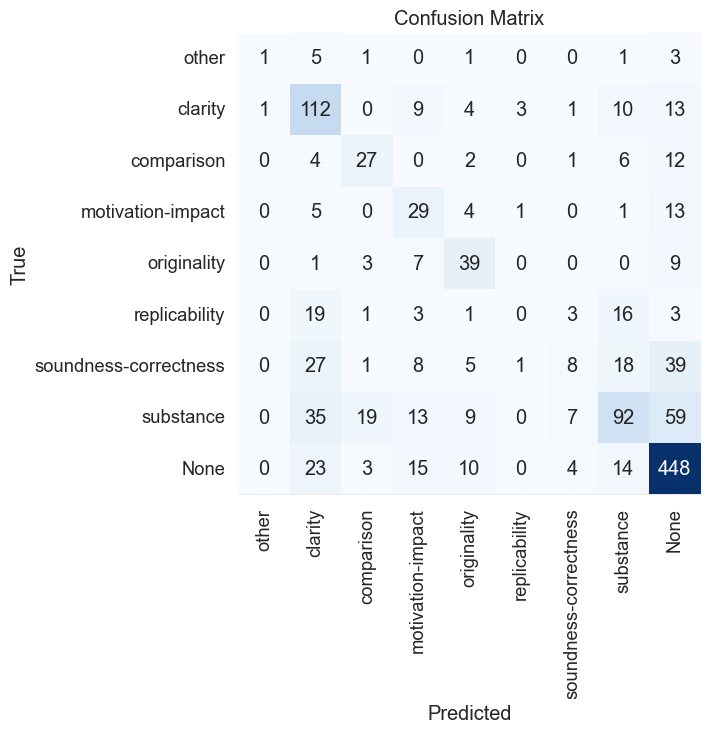

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

pred = []
for v, y in zip(test_texts, test_labels):
    print(predict_category(v), "true: ", y)
    pred.append(predict_category(v))


confusion = confusion_matrix(test_labels, pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
xticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"], 
yticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [21]:
confusion = confusion_matrix(train_labels, pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
xticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"], 
yticklabels=["other", "clarity", "comparison", "motivation-impact", "originality", "replicability", "soundness-correctness",  "substance", "None"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [9616, 100]

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels[:100], pred)
print('Accuracy:', accuracy)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels[:100], pred, average='weighted')
recall = recall_score(test_labels[:100], pred, average='weighted')
f1 = f1_score(test_labels[:100], pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.26
Precision: 0.23492722371967656
Recall: 0.26
F1-Score: 0.23738888888888887


c:\Users\carme\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, pred)
print('Accuracy:', accuracy)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, pred, average='weighted')
recall = recall_score(test_labels, pred, average='weighted')
f1 = f1_score(test_labels, pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.6131386861313869
Precision: 0.5784895861404894
Recall: 0.6131386861313869
F1-Score: 0.5774342176925384


In [ ]:
save_directory = r"C:\Users\carme\OneDrive - Appelt Steuerberatung\Carmen Appelt\Master\Semester 3\DASP\models\roberta-base_multiclass" 


In [ ]:

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

In [ ]:
## ROBERTA 

In [ ]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification

tokenizer = RobertaTokenizer.from_pretrained(save_directory, from_pt=True)
model = TFRobertaForSequenceClassification.from_pretrained(save_directory, from_pt=True)




def predict_category(text):
    inputs = tokenizer(text, truncation=True, padding=True, return_tensors="tf")
    outputs = model(inputs)
    logits = outputs.logits
    prediction_value = tf.argmax(logits, axis=1).numpy()[0]
    return prediction_value


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

pred = []
for v, y in zip(val_texts, val_labels.numpy().tolist()):
    print(predict_category(v), "true: ", y)
    pred.append(predict_category(v))

confusion = confusion_matrix(val_labels, pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["0", "1", "2", "3", "4", "5", "6", "7", "8"],
            yticklabels=["0", "1", "2", "3", "4", "5", "6", "7", "8"])
plt.xlabel('Vorhergesagt')
plt.ylabel('Wahr')
plt.title('Konfusionsmatrix')
plt.show()

